In [1]:
import numpy
import torch
import torch.nn as nn
import numpy as np
import random
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn import decomposition
import copy
import time
import random
import CTRNN
import math
import statistics 

torch.manual_seed(66)
np.random.seed(66)
random.seed(66)

In [2]:
# Is there a minimum number of neurons for the network to be able to learn the task?
# Is there a maximum number of neurons to where performance plateaus?

In [3]:
# create list of trials so each simulation is getting the same data
ntrials = 10000
trials = [CTRNN.Trial(stimulus=random.randint(0,1)) for item in range(ntrials)]

In [4]:
trials_to_loss_dict = {}
time_to_loss_dict = {}

n_to_test = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
nsim = 10
for num_hidden in n_to_test:
    print("hidden neurons: ", num_hidden)
    trials_to_loss = []
    time_to_loss = []

    for num_sims in range(nsim):
        # print("simulation number: ", num_sims)
        net = CTRNN.CTRNN(2, num_hidden, 2)
        criterion = nn.MSELoss()
        learningrate = 0.0001
        optimizer = optim.Adam(net.parameters(), lr=learningrate)
        optimizer.zero_grad()

        start = time.time()
        for idx in range(ntrials):
            out, _ = net(trials[idx].stimulus)
            target = trials[idx].target
            loss = criterion(out, target)
            if loss < 0.01:
                end = time.time()
                trials_to_loss.append(idx)
                time_to_loss.append(end-start)
                break

            loss.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=2.0, norm_type=2)
            optimizer.step()
    
    trials_to_loss_dict[num_hidden] = trials_to_loss
    time_to_loss_dict[num_hidden] = time_to_loss

hidden neurons:  5
hidden neurons:  10
hidden neurons:  20
hidden neurons:  50
hidden neurons:  100
hidden neurons:  200
hidden neurons:  500
hidden neurons:  1000
hidden neurons:  2000
hidden neurons:  3000
hidden neurons:  4000
hidden neurons:  5000
hidden neurons:  6000
hidden neurons:  7000
hidden neurons:  8000
hidden neurons:  9000
hidden neurons:  10000


In [5]:
trials_to_loss_avg = {}
for key in trials_to_loss_dict:
    if trials_to_loss_dict[key] != []:
        trials_to_loss_avg[key] = statistics.mean(trials_to_loss_dict[key])
print(trials_to_loss_avg)

time_to_loss_avg = {}
for key in time_to_loss_dict:
    if time_to_loss_dict[key] != []:
        time_to_loss_avg[key] = statistics.mean(time_to_loss_dict[key])

print(time_to_loss_avg)

{10: 4039.7, 20: 1427.7, 50: 403.8, 100: 213.3, 200: 112.5, 500: 55.5, 1000: 33.4, 2000: 26.2, 3000: 35.7, 4000: 48.2, 5000: 74.6, 6000: 129.4, 7000: 158.8, 8000: 155.4, 9000: 170, 10000: 174.6}
{10: 8.493336653709411, 20: 3.0176429271698, 50: 0.9380702495574951, 100: 0.5315510988235473, 200: 0.5593677282333374, 500: 0.2908973693847656, 1000: 0.37344775199890134, 2000: 0.7825707197189331, 3000: 1.9487754821777343, 4000: 4.1570720195770265, 5000: 11.428892302513123, 6000: 31.96117799282074, 7000: 108.65969009399414, 8000: 595.0823830127716, 9000: 451.666388130188, 10000: 2768.6962279558184}


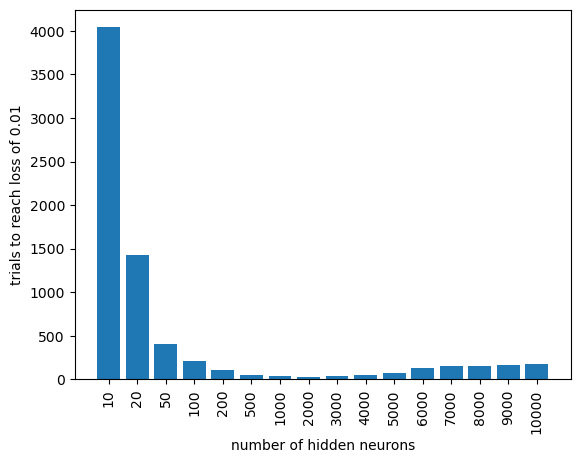

In [7]:
plt.bar(range(len(trials_to_loss_avg)), list(trials_to_loss_avg.values()), align='center')
plt.xticks(range(len(trials_to_loss_avg)), list(trials_to_loss_avg.keys()))
plt.xticks(rotation=90)
plt.xlabel('number of hidden neurons')
plt.ylabel('trials to reach loss of 0.01')
plt.show()

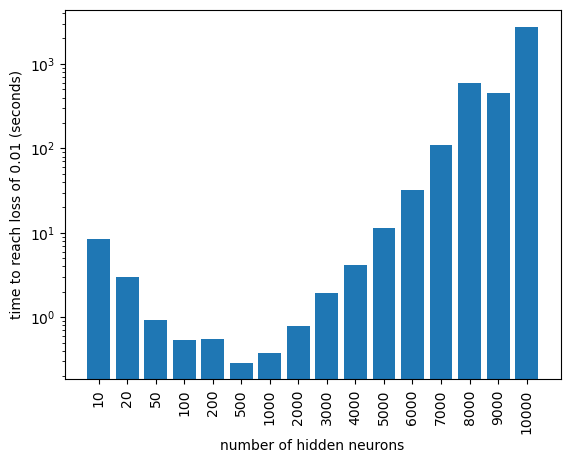

In [8]:
plt.bar(range(len(time_to_loss_avg)), list(time_to_loss_avg.values()), align='center')
plt.yscale('log')
plt.xticks(range(len(time_to_loss_avg)), list(time_to_loss_avg.keys()))
plt.xticks(rotation=90)
plt.xlabel('number of hidden neurons')
plt.ylabel('time to reach loss of 0.01 (seconds)')
plt.show()